<a href="https://colab.research.google.com/github/junxnone/samples/blob/main/hf/datasets/hf_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip -q install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset, Image

In [24]:
dataset = load_dataset("beans", split="train")


## Augmentations


In [6]:
from torchvision.transforms import Compose, ColorJitter, ToTensor
jitter = Compose(
    [ColorJitter(brightness=0.5, hue=0.5), ToTensor()]
)

def transforms(examples):
    examples["pixel_values"] = [jitter(image.convert("RGB")) for image in examples["image"]]
    return examples

dataset = dataset.with_transform(transforms)


In [7]:
dataset

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 1034
})

In [10]:
dataset[0]

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 0,
 'pixel_values': tensor([[[0.0039, 0.0039, 0.0039,  ..., 0.3333, 0.0078, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.2549, 0.0902, 0.0000],
          [0.0000, 0.0000, 0.0039,  ..., 0.2549, 0.0980, 0.0627],
          ...,
          [0.0431, 0.0235, 0.0431,  ..., 0.3529, 0.3882, 0.3373],
          [0.0275, 0.0275, 0.0706,  ..., 0.3804, 0.3529, 0.3725],
          [0.0471, 0.0392, 0.0196,  ..., 0.3373, 0.3686, 0.3529]],
 
         [[0.0314, 0.0314, 0.0314,  ..., 0.4353, 0.1098, 0.1020],
          [0.0275, 0.0275, 0.0275,  ..., 0.3490, 0.1843, 0.0980],
          [0.0275, 0.0275, 0.0314,  ..., 0.3333, 0.1843, 0.1412],
          ...,
          [0.1098, 0.0902, 0.1059,  ..., 0.2549, 0.2902, 0.2392],

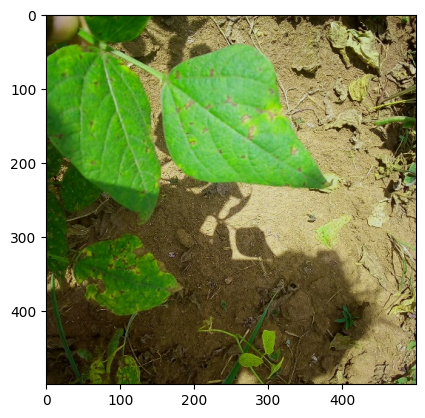

In [13]:
# prompt: show the dataset[0]['pixel_values'] as image

import matplotlib.pyplot as plt
import numpy as np

# Assuming dataset[0]['pixel_values'] is a tensor
pixel_values = dataset[0]['pixel_values'].numpy()

# Transpose to (height, width, channels) if needed
if len(pixel_values.shape) == 3 and pixel_values.shape[0] == 3:
  pixel_values = pixel_values.transpose(1, 2, 0)

# Display the image
plt.imshow(pixel_values)
plt.show()

In [16]:

# Get the unique labels and their IDs
labels = dataset.features['labels'].names
label_ids = list(range(len(labels)))

# Print the labels and their corresponding IDs
for label_id, label in zip(label_ids, labels):
  print(f"Label ID: {label_id}, Label: {label}")

Label ID: 0, Label: angular_leaf_spot
Label ID: 1, Label: bean_rust
Label ID: 2, Label: healthy


## shuffle and sort dataset

In [44]:
shuffle_dataset = dataset.shuffle(seed=42)
shuffle_dataset['labels'][:10]

[1, 0, 1, 0, 2, 2, 2, 1, 1, 2]

In [45]:
sorted_dataset = shuffle_dataset.sort("labels")
sorted_dataset['labels'][:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]